In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
import io
%cd "C:\Users\lokes\Downloads"

C:\Users\lokes\Downloads


In [68]:
import io 
%cd "C:\Users\lokes\Downloads"

C:\Users\lokes\Downloads


In [69]:
hrtrain=pd.read_csv("train_LZdllcl.csv")

In [70]:
hrtest=pd.read_csv("test_2umaH9m.csv")

In [71]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [72]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [73]:
#for preprocessing concat both dataframes
#Add dependent variable temporiLY to test data
hrtest['is_promoted']='test'

In [74]:
#concat both dataframes-Row concatenation
combinedf=pd.concat([hrtrain,hrtest],axis=0)

In [75]:
combinedf.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [76]:
objcols=combinedf[['department', 'region', 'education', 'gender','recruitment_channel',
                   'previous_year_rating','KPIs_met >80%', 'awards_won?','is_promoted']]

In [77]:
numcols=combinedf[['no_of_trainings', 'age','length_of_service','avg_training_score']]

In [78]:
combinedf.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [79]:
for i in objcols.columns:
    freq=objcols[i].value_counts(dropna=False)
    print(freq)

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64
region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64
Bachelor's          52247
Master's & above    21429
N

In [80]:
#most frequent imputation
for i in objcols.columns:
    objcols[i]=objcols[i].fillna(objcols[i].value_counts().idxmax())
    
#idxmax(): index corresponding to maximum frequency or most_frequent

C:\Users\lokes\AppData\Local\Temp\ipykernel_15228\897392870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[i]=objcols[i].fillna(objcols[i].value_counts().idxmax())
C:\Users\lokes\AppData\Local\Temp\ipykernel_15228\897392870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objcols[i]=objcols[i].fillna(objcols[i].value_counts().idxmax())
C:\Users\lokes\AppData\Local\Temp\ipykernel_15228\897392870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [81]:
combinedf.education.value_counts().idxmax()

"Bachelor's"

In [82]:
objcols.previous_year_rating.value_counts().idxmax()

3.0

In [83]:
objcols.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')

In [84]:
#dummy encoding only on independnt varaiables(X's)
#label encoding only on dependent variable(y) in classification only
objcols_dummy=pd.get_dummies(objcols,columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?'])

In [85]:
objcols_dummy.shape

(78298, 61)

In [86]:
objcols_dummy.head()

,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,...,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [87]:
#concat both dataframes
combinedf_clean=pd.concat([numcols,objcols_dummy],axis=1)

In [88]:
hrtrain_df=combinedf_clean[combinedf_clean.is_promoted!='test']
hrtest_df=combinedf_clean[combinedf_clean.is_promoted=='test']

In [89]:
hrtest_df=hrtest_df.drop('is_promoted',axis=1)

In [90]:
#to check the excel output 
X=hrtrain_df[['no_of_trainings', 'age','length_of_service','avg_training_score']]
y=hrtrain_df.is_promoted

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
y=LabelEncoder().fit_transform(y)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
logit=LogisticRegression()

In [95]:
logitmodel=logit.fit(X,y)

In [96]:
logitmodel.score(X,y) #Accuracy from confusion matrix

0.9148299518318493

In [97]:
logitmodel.intercept_

array([-5.06231887])

In [98]:
pd.DataFrame(logitmodel.coef_,columns=X.columns)

,no_of_trainings,age,length_of_service,avg_training_score
0,-0.244386,-0.005327,0.002718,0.047163


In [99]:
logitpredict=logitmodel.predict(X)

In [100]:
pd.crosstab(y,logitpredict)#confusion matrix

col_0,0
row_0,
0,50140
1,4668


In [101]:
50140/(50140+4668)

0.9148299518318493

In [102]:
X=hrtrain_df.drop('is_promoted',axis=1)

In [103]:
logit=LogisticRegression(max_iter=2000,random_state=42)
#ConvergenceWarning=all coeffi in equation are not calculated
# increase iterations or scale independnt variables is solution

In [104]:
logitmodel=logit.fit(X,y)

In [105]:
logitmodel.score(X,y)#accuracy from confusion matrix

0.9316340680192673

In [106]:
logitpredict=logitmodel.predict(X)

In [107]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,49832,308
1,3439,1229


In [108]:
# TN - 49832
# FP - 308
# FN - 3439
# TP - 1229

# is_promoted - o is NO - Negative
# is_promoted - 1 is Yes - Positive


In [109]:
(49832+1229)/(49832+308+3439+1229)

0.9316340680192673

In [110]:
#sensitivity or recall = TP/TP+FN
1229/(1229+3439)

0.26328191945158524

In [111]:
#specificity = TN/TN+FP
49832/(49832+308)

0.9938571998404467

In [112]:
#precision = TP/TP+FP
1229/(1229+308)

0.7996096291476903

In [113]:
#negative predict value = TN/TN+FN
49832/(49832+3439)

0.9354432993561225

In [114]:
#F1 score = 2*(precision*recall)/(precision+recall)
2*(0.7996096291476903*0.26328191945158524)/(0.7996096291476903+0.26328191945158524)

0.3961321514907333

In [115]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y,logitpredict))
#imbalance data or imbalance in dependt variable classes
# 0- 50140 majority class
# 1- 4668 minority  class which is worst prediction

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50140
           1       0.80      0.26      0.40      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.92      0.93      0.92     54808



In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
tree=DecisionTreeClassifier(max_depth=12)

In [119]:
treemodel=tree.fit(X,y)

In [120]:
treemodel.score(X,y)

0.9448620639322727

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
#cross validation - 5 times to confirm overfitting
cross_val_score(tree,X,y)

array([0.93614304, 0.93504835, 0.93915344, 0.94106377, 0.93577228])

In [123]:
tree_test_pred=treemodel.predict(hrtest_df)

In [124]:
pd.DataFrame(tree_test_pred).to_csv("tree.csv")

In [125]:
from sklearn.metrics import RocCurveDisplay

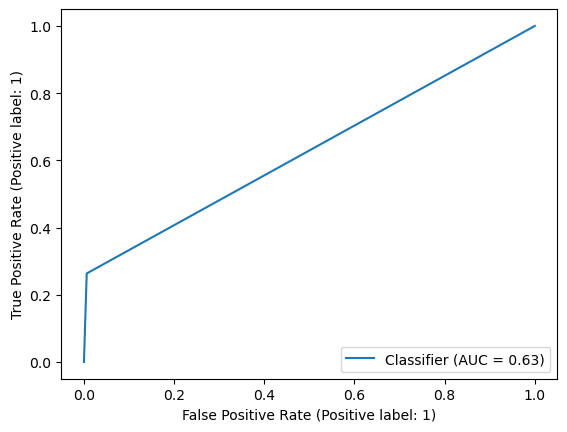

In [126]:
RocCurveDisplay.from_predictions(y,logitpredict)

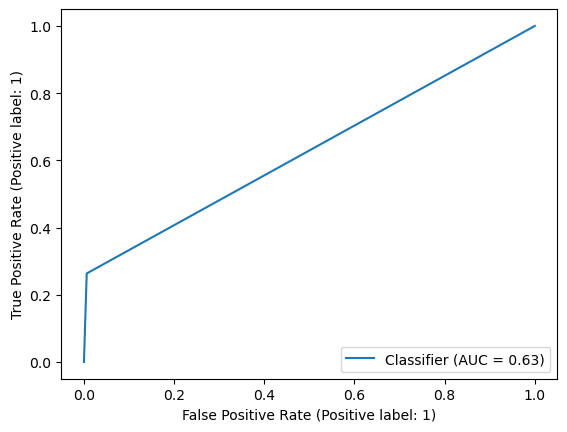

In [65]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [127]:
pd.set_option("display.max_rows",81)
pd.DataFrame(treemodel.feature_importances_,X.columns).sort_values(by=0,ascending=False)

,0
avg_training_score,0.371155
department_Sales & Marketing,0.145536
KPIs_met >80%_0,0.100673
department_Operations,0.085676
awards_won?_1,0.053562
previous_year_rating_5.0,0.026697
department_Finance,0.025963
department_Analytics,0.025721
length_of_service,0.020428
age,0.017620


In [128]:
X.shape

(54808, 64)

In [129]:
from sklearn.tree import plot_tree,export_text

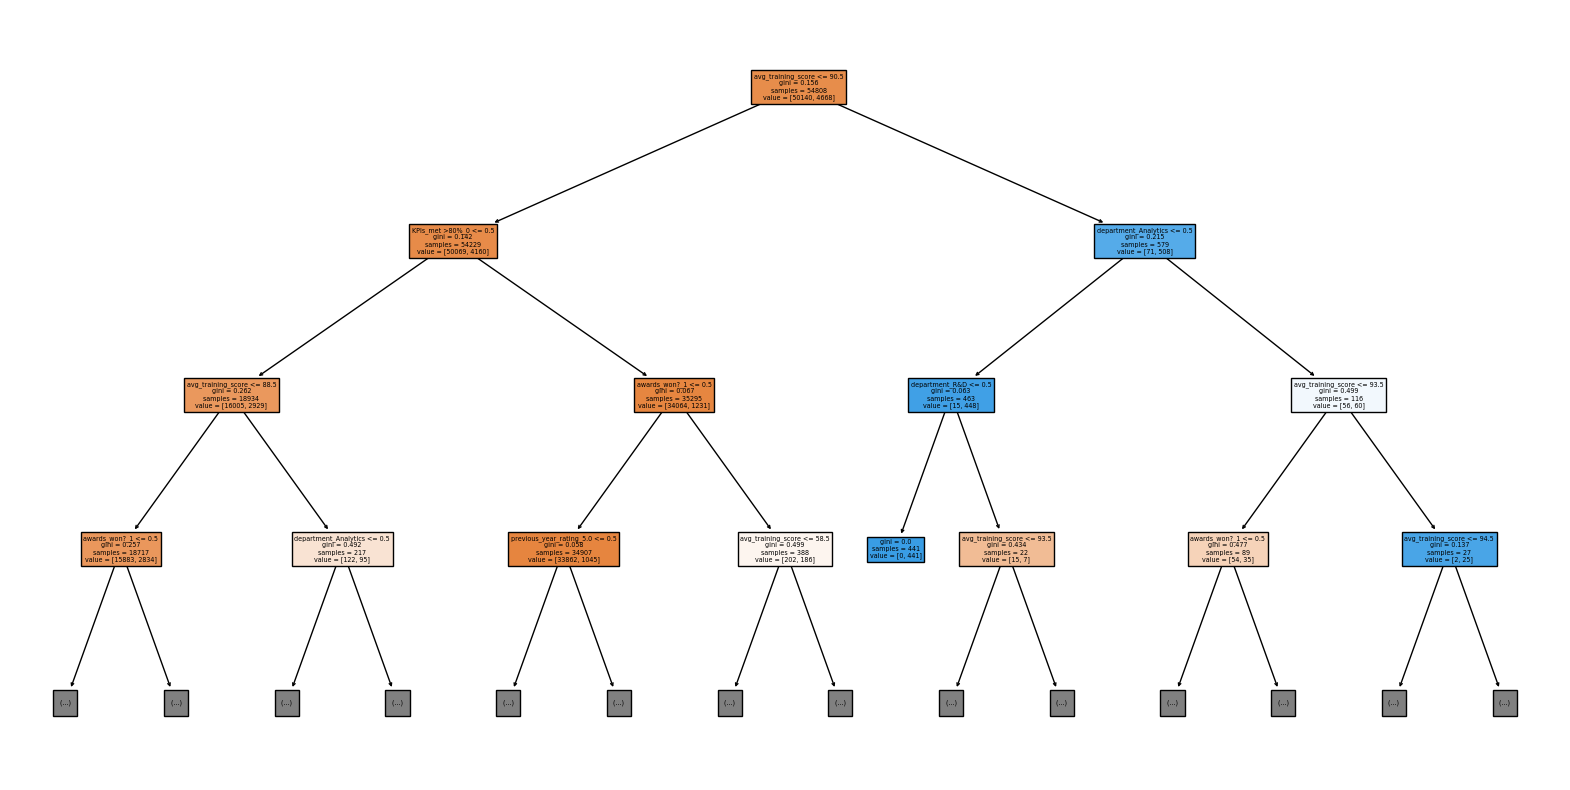

In [130]:
plt.figure(figsize=(20,10))
plot_tree(treemodel,max_depth=3,feature_names=X.columns,filled=True)
plt.show()

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
RF=RandomForestClassifier(n_estimators=100)

In [133]:
RFmodel=RF.fit(X,y)

In [134]:
RFmodel.score(X,y)

0.999744562837542

In [135]:
cross_val_score(RF,X,y)

array([0.9348659 , 0.92975734, 0.93304142, 0.93184928, 0.93111942])

In [136]:
np.mean(cross_val_score(RF,X,y))

0.9327105234409816

In [137]:
RFpredict=y-RFmodel.predict(X)

In [138]:
RFresid=y-RFpredict

In [139]:
np.sqrt(np.mean(RFresid**2))

0.2915263162256697

In [140]:
RF_test_pred=RFmodel.predict(hrtest_df)

In [141]:
pd.DataFrame(RF_test_pred).to_csv("randomforest.csv")

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

In [143]:
GBR=GradientBoostingClassifier(n_estimators=100)

In [144]:
GBRmodel=GBR.fit(X,y)

In [145]:
GBRmodel.score(X,y)

0.9406291052401109

In [146]:
GBR_test_pred=GBRmodel.predict(hrtest_df)

In [147]:
pd.DataFrame(GBR_test_pred).to_csv("GBR_HR.csv")